In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import re
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer



In [0]:
articles = pd.read_csv('articles_final.csv')
articles


,ID,title,link,date,summary,image_link,article_id,text,relchange,price,evolution,Year,Month,Day,DayWeek
0,0,Oil Is Now More Volatile Than Bitcoin,https://oilprice.com/Energy/Oil-Prices/Oil-Is-...,25/02/2020,You know that the oil markets have truly gone ...,https://d32r1sh890xpii.cloudfront.net/article/...,0,You know that the oil markets have truly gone ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,China‚Äôs Floods The Market With Fuel As Coron...,https://oilprice.com/Energy/Crude-Oil/Chinas-F...,25/02/2020,China‚Äôs fuel exports are booming amid batter...,https://d32r1sh890xpii.cloudfront.net/article/...,1,China‚Äôs fuel exports are booming amid batter...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Supersizing The Solar Industry,https://oilprice.com/Energy/Energy-General/Sup...,25/02/2020,There‚Äôs a new trend in solar energy projects...,https://d32r1sh890xpii.cloudfront.net/article/...,2,There‚Äôs a new trend in solar energy projects...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Oil Falls Below $50 On Demand Fears,https://oilprice.com/Energy/Energy-General/WTI...,25/02/2020,If you haven't received our latest Global Ener...,https://d32r1sh890xpii.cloudfront.net/article/...,3,If you haven't received our latest Global Ener...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Saudi Arabia: OPEC Should Pay Serious Attentio...,https://oilprice.com/Energy/Crude-Oil/Saudi-Ar...,25/02/2020,The OPEC+ group should not be complacent about...,https://d32r1sh890xpii.cloudfront.net/article/...,4,The OPEC+ group should not be complacent about...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,1485,Is This The Key To Wider Nuclear Adoption?,https://oilprice.com/Energy/Energy-General/Is-...,4/9/2019,"Around the world, a debate about nuclear energ...",https://d32r1sh890xpii.cloudfront.net/article/...,1485,"Around the world, a debate about nuclear energ...",4.284919,56.22,Up,2019.0,9.0,4.0,Wednesday
1485,1486,World‚Äôs Largest EV Markets Face Slowdown,https://oilprice.com/Energy/Energy-General/Wor...,4/9/2019,For electric vehicle sales to reach a solid sh...,https://d32r1sh890xpii.cloudfront.net/article/...,1486,For electric vehicle sales to reach a solid sh...,4.284919,56.22,Up,2019.0,9.0,4.0,Wednesday
1486,1487,Russia To Expand In World‚Äôs Fastest Growing ...,https://oilprice.com/Energy/Energy-General/Rus...,4/9/2019,Russia and India are about to get a lot more i...,https://d32r1sh890xpii.cloudfront.net/article/...,1487,Russia and India are about to get a lot more i...,4.284919,56.22,Up,2019.0,9.0,4.0,Wednesday
1487,1488,Oil Jumps 4% On Positive Chinese Economic Data,https://oilprice.com/Energy/Oil-Prices/Oil-Jum...,4/9/2019,The bleak outlook on the overall global econom...,https://d32r1sh890xpii.cloudfront.net/article/...,1488,The bleak outlook on the overall global econom...,4.284919,56.22,Up,2019.0,9.0,4.0,Wednesday


In [0]:
articles.describe()

,ID,article_id,relchange,price,Year,Month,Day
count,1489.000000,1489.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000
mean,744.206179,744.206179,0.020041,56.310556,2019.286529,7.880969,15.195296
std,430.265264,430.265264,2.088870,3.208632,0.452301,4.245088,8.466031
min,0.000000,0.000000,-6.085578,49.590000,2019.000000,1.000000,1.000000
25%,372.000000,372.000000,-0.952210,53.750000,2019.000000,2.000000,8.000000
50%,744.000000,744.000000,0.000000,56.450000,2019.000000,10.000000,14.000000
75%,1116.000000,1116.000000,0.826780,58.460000,2020.000000,11.000000,22.000000
max,1489.000000,1489.000000,15.230095,63.270000,2020.000000,12.000000,31.000000


In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from wordcloud import STOPWORDS
print(STOPWORDS)

Stopwords = list(STOPWORDS)
Stopwords.append("Äôs")
Stopwords.append("äôt")
Stopwords.append("ä")
Stopwords.append("ù")
Stopwords.append("äù")
Stopwords.append("äô")
Stopwords.append("background color")
Stopwords.append("vemba")



print(Stopwords)

{'other', "they'd", 'hers', 'on', "how's", "weren't", 'most', 'to', 'after', "isn't", "shan't", "we'll", 'only', "i'll", 'has', "haven't", 'both', 'also', 'those', 'where', 'out', 'then', "you'd", 'doing', 'its', 'just', "he's", 'they', 'the', 'had', "they've", 'myself', 'r', 'by', 'each', 'over', 'been', 'for', 'here', 'am', 'k', "didn't", 'so', 'www', "they'll", 'again', "let's", 'into', 'would', 'any', 'an', 'i', 'him', 'themselves', 'shall', 'when', "i'd", "why's", 'could', 'down', 'while', "doesn't", 'further', "won't", 'all', 'ought', 'very', 'a', "can't", 'between', 'few', 'herself', 'our', 'since', 'at', 'she', "when's", "aren't", 'up', 'however', 'cannot', 'once', 'theirs', "hadn't", "that's", 'there', 'we', 'during', "don't", 'his', 'what', 'until', 'himself', 'does', 'else', "couldn't", "hasn't", 'were', 'can', 'should', "wouldn't", 'be', 'otherwise', 'my', "she'd", 'ourselves', "you'll", 'of', 'itself', "we'd", 'more', 'under', "where's", 'have', 'no', 'did', "here's", 'if'

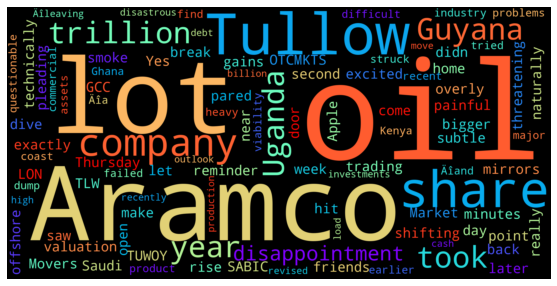

In [0]:
wordcloudoil = WordCloud(max_font_size=100, max_words=100, scale=6, stopwords= Stopwords, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(str(articles.iloc[598][7]))
plt.figure(figsize=(10,5))
plt.imshow(wordcloudoil,interpolation="bilinear")
plt.axis("off")
plt.show()


In [0]:
newdf = articles[(articles.evolution == 'Up') | (articles.evolution == 'Down')]
newdf.shape

(1403, 15)

In [0]:
newdf['text2'] = newdf['text'].apply(lambda x: x.lower())
evol = newdf[['evolution','text2']]
evol

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,evolution,text2
54,Up,"historically, russia goes to great lengths to ..."
55,Up,last year oilprice reported that the energy st...
56,Up,the specter of stranded assets in the us elect...
57,Up,a dubai-based operator of ports and terminals ...
58,Up,if you haven't received our latest global ener...
...,...,...
1484,Up,"around the world, a debate about nuclear energ..."
1485,Up,for electric vehicle sales to reach a solid sh...
1486,Up,russia and india are about to get a lot more i...
1487,Up,the bleak outlook on the overall global econom...


In [0]:
from textblob import TextBlob, Word, Blobber

In [0]:
evol.text2.head(10)

54    historically, russia goes to great lengths to ...
55    last year oilprice reported that the energy st...
56    the specter of stranded assets in the us elect...
57    a dubai-based operator of ports and terminals ...
58    if you haven't received our latest global ener...
59    internal combustion engine basicsdiv[id^="vemb...
60    earlier this month analysts sounded the alarm ...
61    saudi arabia‚äôs oil exports dropped by 10.75 ...
62    after several consecutive days of gains, oil p...
63    the battery craze isn‚äôt really about batteri...
Name: text2, dtype: object

In [0]:
evol.text2.describe()

count                                                  1403
unique                                                 1372
top       president trump thought he had settled the iss...
freq                                                      2
Name: text2, dtype: object

In [0]:
 pip install -U textblob

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)


In [0]:
from textblob import TextBlob, Word, Blobber

In [0]:
def split_into_tokens(message):
    message = message  # convert bytes into proper unicode
    return TextBlob(message).words

In [0]:
import nltk

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
evol.text2.apply(split_into_tokens)

54      [historically, russia, goes, to, great, length...
55      [last, year, oilprice, reported, that, the, en...
56      [the, specter, of, stranded, assets, in, the, ...
57      [a, dubai-based, operator, of, ports, and, ter...
58      [if, you, have, n't, received, our, latest, gl...
                              ...                        
1484    [around, the, world, a, debate, about, nuclear...
1485    [for, electric, vehicle, sales, to, reach, a, ...
1486    [russia, and, india, are, about, to, get, a, l...
1487    [the, bleak, outlook, on, the, overall, global...
1488    [the, first, week, of, september, continued, o...
Name: text2, Length: 1403, dtype: object

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
def split_into_lemmas(message):
    message = message.lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

evol.text2.apply(split_into_lemmas)


54      [historically, russia, go, to, great, length, ...
55      [last, year, oilprice, reported, that, the, en...
56      [the, specter, of, stranded, asset, in, the, u...
57      [a, dubai-based, operator, of, port, and, term...
58      [if, you, have, n't, received, our, latest, gl...
                              ...                        
1484    [around, the, world, a, debate, about, nuclear...
1485    [for, electric, vehicle, sale, to, reach, a, s...
1486    [russia, and, india, are, about, to, get, a, l...
1487    [the, bleak, outlook, on, the, overall, global...
1488    [the, first, week, of, september, continued, o...
Name: text2, Length: 1403, dtype: object

In [0]:
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(evol['text2'])
print(len(bow_transformer.vocabulary_))
print(bow_transformer.get_feature_names()[:10])

38729
["''a", "''very", "'60", "'a", "'act", "'america", "'arab", "'are", "'bridging", "'compensates"]


In [0]:
evol_bow = bow_transformer.transform(evol['text2'])
print('sparse matrix shape:', evol_bow.shape)
print('number of non-zeros:', evol_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * evol_bow.nnz / (evol_bow.shape[0] * evol_bow.shape[1])))

sparse matrix shape: (1403, 38729)
number of non-zeros: 485126
sparsity: 0.89%


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
tfidf_transformer = TfidfTransformer().fit(evol_bow)
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['capital']])
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['america']])

2.8221305671043537
3.4430595398525


In [0]:
evol_tfidf = tfidf_transformer.transform(evol_bow)
print(evol_tfidf.shape)

(1403, 38729)


In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [0]:
train, test = train_test_split(newdf, test_size=0.3, train_size=0.7, random_state=14)
train.shape, test.shape

((982, 16), (421, 16))

In [0]:
evol_train, evol_test= train_test_split(evol,  test_size=0.3, train_size=0.7 , random_state=14)
evol_tfidf_train, evol_tfidf_test= train_test_split(evol_tfidf,  test_size=0.3, train_size=0.7 , random_state=123)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
evol_tfidf_train.shape

(982, 38729)

In [0]:
evolution = MultinomialNB().fit(evol_tfidf, evol['evolution'])
train_predictions = evolution.predict(evol_tfidf_train)
tr_acc = accuracy_score(evol_train['evolution'], train_predictions)
print("Accuracy on training set:  %.2f%%" % (100 * tr_acc))

Accuracy on training set:  51.02%


In [0]:
evolution = MultinomialNB().fit(evol_tfidf, evol['evolution'])
test_predictions = evolution.predict(evol_tfidf_test)
tr_acc = accuracy_score(evol_test['evolution'], test_predictions)
print("Accuracy on test set:  %.2f%%" % (100 * tr_acc))

Accuracy on test set:  47.74%


In [0]:
evolution = MultinomialNB().fit(evol_tfidf, evol['evolution'])
all_predictions = evolution.predict(evol_tfidf)
tr_acc = accuracy_score(evol['evolution'], all_predictions)
print("Accuracy on whole set:  %.2f%%" % (100 * tr_acc))

Accuracy on whole set:  89.09%


In [0]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [0]:
allpreds = pd.DataFrame(all_predictions)
newdf.reset_index()
newdf['Predictions'] = allpreds
newdf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,title,link,date,summary,image_link,article_id,text,relchange,price,evolution,Year,Month,Day,DayWeek,text2,Predictions
54,54,Russia Is Defeating The U.S. In The Middle Eas...,https://oilprice.com/Geopolitics/Middle-East/R...,18/02/2020,"Historically, Russia goes to great lengths to ...",https://d32r1sh890xpii.cloudfront.net/article/...,54,"Historically, Russia goes to great lengths to ...",0.134538,52.10,Up,2020.0,2.0,18.0,Tuesday,"historically, russia goes to great lengths to ...",Up
55,55,Can The U.S. Compete With China In The Energy ...,https://oilprice.com/Alternative-Energy/Renewa...,18/02/2020,Last year Oilprice reported that the energy st...,https://d32r1sh890xpii.cloudfront.net/article/...,55,Last year Oilprice reported that the energy st...,0.134538,52.10,Up,2020.0,2.0,18.0,Tuesday,last year oilprice reported that the energy st...,Up
56,56,The Risk Of Stranded Energy Assets,https://oilprice.com/Energy/Energy-General/The...,18/02/2020,The specter of stranded assets in the US elect...,https://d32r1sh890xpii.cloudfront.net/article/...,56,The specter of stranded assets in the US elect...,0.134538,52.10,Up,2020.0,2.0,18.0,Tuesday,the specter of stranded assets in the us elect...,Up
57,57,A Middle East Financial Crisis Is In The Making,https://oilprice.com/Energy/Energy-General/A-M...,18/02/2020,A Dubai-based operator of ports and terminals ...,https://d32r1sh890xpii.cloudfront.net/article/...,57,A Dubai-based operator of ports and terminals ...,0.134538,52.10,Up,2020.0,2.0,18.0,Tuesday,a dubai-based operator of ports and terminals ...,Up
58,58,Uncertainty Brings An End To The Oil Price Reb...,https://oilprice.com/Energy/Energy-General/Unc...,18/02/2020,If you haven't received our latest Global Ener...,https://d32r1sh890xpii.cloudfront.net/article/...,58,If you haven't received our latest Global Ener...,0.134538,52.10,Up,2020.0,2.0,18.0,Tuesday,if you haven't received our latest global ener...,Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,1485,Is This The Key To Wider Nuclear Adoption?,https://oilprice.com/Energy/Energy-General/Is-...,4/9/2019,"Around the world, a debate about nuclear energ...",https://d32r1sh890xpii.cloudfront.net/article/...,1485,"Around the world, a debate about nuclear energ...",4.284919,56.22,Up,2019.0,9.0,4.0,Wednesday,"around the world, a debate about nuclear energ...",NaN
1485,1486,World‚Äôs Largest EV Markets Face Slowdown,https://oilprice.com/Energy/Energy-General/Wor...,4/9/2019,For electric vehicle sales to reach a solid sh...,https://d32r1sh890xpii.cloudfront.net/article/...,1486,For electric vehicle sales to reach a solid sh...,4.284919,56.22,Up,2019.0,9.0,4.0,Wednesday,for electric vehicle sales to reach a solid sh...,NaN
1486,1487,Russia To Expand In World‚Äôs Fastest Growing ...,https://oilprice.com/Energy/Energy-General/Rus...,4/9/2019,Russia and India are about to get a lot more i...,https://d32r1sh890xpii.cloudfront.net/article/...,1487,Russia and India are about to get a lot more i...,4.284919,56.22,Up,2019.0,9.0,4.0,Wednesday,russia and india are about to get a lot more i...,NaN
1487,1488,Oil Jumps 4% On Positive Chinese Economic Data,https://oilprice.com/Energy/Oil-Prices/Oil-Jum...,4/9/2019,The bleak outlook on the overall global econom...,https://d32r1sh890xpii.cloudfront.net/article/...,1488,The bleak outlook on the overall global econom...,4.284919,56.22,Up,2019.0,9.0,4.0,Wednesday,the bleak outlook on the overall global econom...,NaN


In [0]:
Synthesis = pd.DataFrame({'Date' : newdf.date.unique()})
Synthesis['evolution'] = Synthesis.apply(lambda _: '', axis=1)
Synthesis['Prediction'] = Synthesis.apply(lambda _: '', axis=1)

In [0]:
Synthesis.Prediction.loc[108]

''

In [0]:
Synthesis.reset_index()
newdf.reset_index()
for i in range(107):
  Synthesis.evolution.iloc[i] = newdf.evolution[newdf.date == Synthesis.Date.iloc[i]].mode()[0]
  Synthesis.Prediction.iloc[i] = newdf.Predictions[newdf.date == Synthesis.Date.iloc[i]].mode()[0]


Synthesis.Prediction.iloc[108] = newdf.Predictions[newdf.date == Synthesis.Date.iloc[108].mode()[0]




SyntaxError: ignored

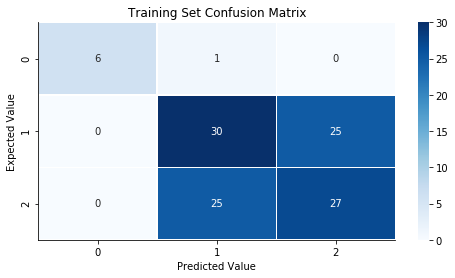

In [0]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(confusion_matrix(Synthesis['Prediction'],Synthesis['evolution']), annot=True, linewidths=.5, ax=ax, cmap="Blues", fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Set Confusion Matrix')
sns.despine(ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

### The first part of the notebook analyzes each articles in order to make a prediction: whether the oil price will go up or down. Given that there are many articles per day, we make multiple predictions for the same day. Very often, all articles point to the same evolution of the price for a given day.
### After Making these predictions, we will aggregate all texts by date in order to make unique predictions on how the price will evolve. This way, we can make unique predictions on each date.


In [0]:
'newdf.columns
newdf = newdf.rename(columns = {"Year ":"Year"})

In [0]:
Parse = pd.read_csv('Parse3.csv', header=0 , index_col=0)
Parse['Aggregated'] = ""
Parse['Year'] = pd.DatetimeIndex(Parse['Date']).year
Parse['Month'] = pd.DatetimeIndex(Parse['Date']).month
Parse['Day'] = pd.DatetimeIndex(Parse['Date']).day


Parse


,Date,Aggregated,Year,Month,Day
0,2020/2/18,,2020,2,18
1,2020/2/17,,2020,2,17
2,2020/2/14,,2020,2,14
3,2020/2/13,,2020,2,13
4,2020/2/12,,2020,2,12
...,...,...,...,...,...
109,2019/9/10,,2019,9,10
110,2019/9/9,,2019,9,9
111,2019/9/6,,2019,9,6
112,2019/9/5,,2019,9,5


In [0]:
newdf = newdf.rename(columns = {'Year ':'Year'})
Parse.reset_index()
newdf.reset_index()
Parse["evolution"] = ""
Parse["price"] = " "
for k in range(len(Parse)):
  for i in range(len(newdf)):
    if(newdf.Year.iloc[i] == Parse.Year.iloc[k] and newdf.Month.iloc[i] == Parse.Month.iloc[k] and newdf.Day.iloc[i] == Parse.Day.iloc[k]  ):
      Parse.Aggregated.iloc[k] = Parse.Aggregated.iloc[k] + newdf.text2.iloc[i]
      Parse.evolution.iloc[k]= newdf.evolution.iloc[i]
      Parse.price.iloc[k] = newdf.price.iloc[i]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
Parse.reset_index()
Parse['relchange'] = np.zeros(len(Parse))
for i in range(0, len(Parse)-1):
   Parse['relchange'].iloc[i]= (((Parse.price.iloc[i]/Parse.price.iloc[i+1])-1)*100)
Parse

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Date,Aggregated,Year,Month,Day,evolution,price,relchange
0,2020/2/18,"historically, russia goes to great lengths to ...",2020,2,18,Up,52.1,0.134538
1,2020/2/17,the battery craze isn‚äôt really about batteri...,2020,2,17,Up,52.03,0.000000
2,2020/2/14,as the coronavirus continues to take a toll on...,2020,2,14,Up,52.03,1.205991
3,2020/2/13,china has a monopoly on one of the most strate...,2020,2,13,Up,51.41,0.547624
4,2020/2/12,"fossil fuel companies hold vast oil, gas and c...",2020,2,12,Up,51.13,2.260000
...,...,...,...,...,...,...,...,...
109,2019/9/10,after years of improvements in drilling techni...,2019,9,10,Down,57.37,-0.881133
110,2019/9/9,"in a dramatic reshuffling, saudi arabia replac...",2019,9,9,Up,57.88,2.533215
111,2019/9/6,it‚äôs not a secret: opec has painted itself i...,2019,9,6,Up,56.45,0.213030
112,2019/9/5,the world‚äôs largest oilfield services compan...,2019,9,5,Up,56.33,0.195660


In [0]:
Parse['relchange'].argmax()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


105

In [1]:
print( Parse.Date[105])
print( Parse.price[105])
print(Parse.relchange[105])

NameError: ignored

In [0]:
wordcloudoil_maxdown2 = WordCloud(max_font_size=1000, max_words=400, scale=10, stopwords= Stopwords, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(Parse.Aggregated[28])
plt.figure(figsize=(17,10))
plt.imshow(wordcloudoil_maxdown2,interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
Parse['relchange'].argmin()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


104

In [0]:
print( Parse.Date[104])
print( Parse.price[104])

2019/9/17
59.26


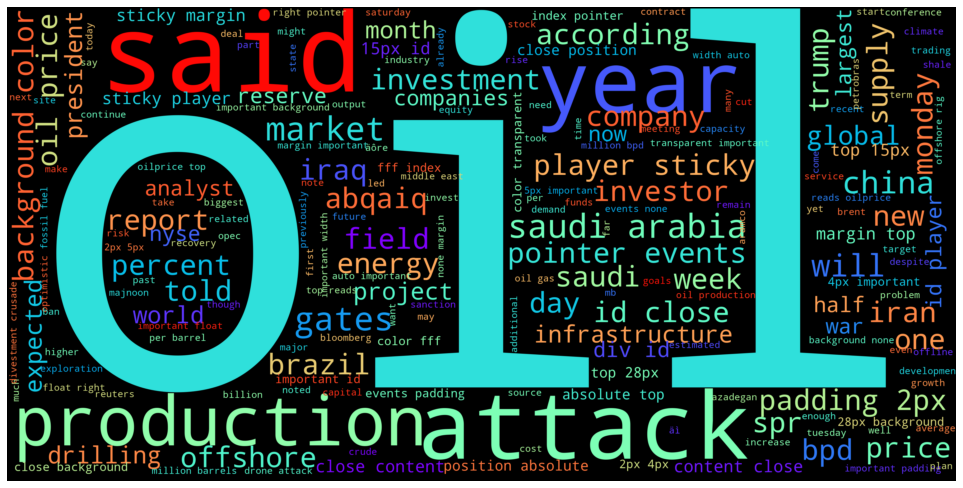

In [0]:
wordcloudoil_maxdown = WordCloud(max_font_size=1000, max_words=500, scale=10, stopwords= Stopwords, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(str(Parse.Aggregated[104]))
plt.figure(figsize=(17,10))
plt.imshow(wordcloudoil_maxdown,interpolation="bilinear")
plt.axis("off")
plt.show()

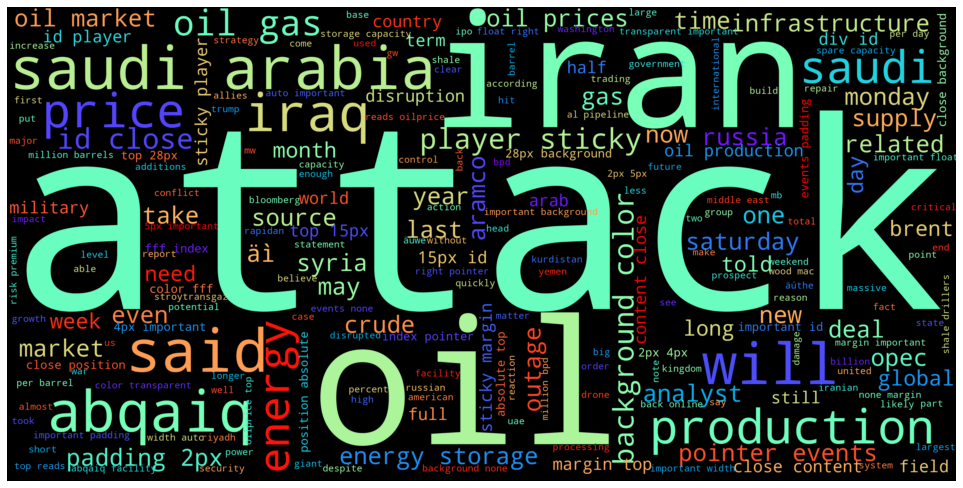

In [0]:
wordcloudoil_maxup = WordCloud(max_font_size=1000, max_words=400, scale=10, stopwords= Stopwords, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(Parse.Aggregated[105])
plt.figure(figsize=(17,10))
plt.imshow(wordcloudoil_maxup,interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
Parse.Aggregated.apply(split_into_tokens)

0      [historically, russia, goes, to, great, length...
1      [the, battery, craze, isn‚äôt, really, about, ...
2      [as, the, coronavirus, continues, to, take, a,...
3      [china, has, a, monopoly, on, one, of, the, mo...
4      [fossil, fuel, companies, hold, vast, oil, gas...
                             ...                        
109    [after, years, of, improvements, in, drilling,...
110    [in, a, dramatic, reshuffling, saudi, arabia, ...
111    [it‚äôs, not, a, secret, opec, has, painted, i...
112    [the, world‚äôs, largest, oilfield, services, ...
113    [the, democratic, presidential, candidates, ar...
Name: Aggregated, Length: 114, dtype: object

In [0]:
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(Parse['Aggregated'])
print(len(bow_transformer.vocabulary_))
print(bow_transformer.get_feature_names()[:10])

38746
["''a", "''very", "'60", "'a", "'act", "'america", "'arab", "'are", "'bridging", "'compensates"]


In [0]:
evol_bow = bow_transformer.transform(Parse['Aggregated'])
print('sparse matrix shape:', evol_bow.shape)
print('number of non-zeros:', evol_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * evol_bow.nnz / (evol_bow.shape[0] * evol_bow.shape[1])))

sparse matrix shape: (114, 38746)
number of non-zeros: 252151
sparsity: 5.71%


In [0]:
tfidf_transformer = TfidfTransformer().fit(evol_bow)
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['capital']])
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['america']])

1.0628009012390305
1.4682660093471949


In [0]:
parse_tfidf = tfidf_transformer.transform(evol_bow)
print(parse_tfidf.shape)

(114, 38746)


In [0]:
train, test = train_test_split(Parse, test_size=0.3, train_size=0.7, random_state=14)
train.shape, test.shape

((79, 8), (35, 8))

In [0]:
evolution = MultinomialNB().fit(parse_tfidf, Parse['evolution'])
all_predictions_agg = evolution.predict(parse_tfidf)
tr_acc = accuracy_score(Parse['evolution'], all_predictions_agg)
print("Accuracy on training set:  %.2f%%" % (100 * tr_acc))

Accuracy on training set:  51.75%


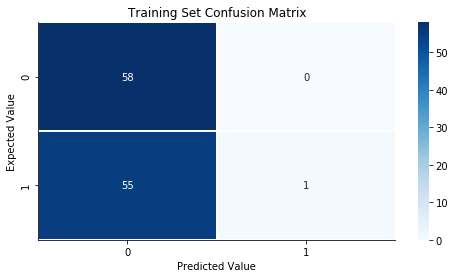

In [0]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(confusion_matrix(Parse['evolution'], all_predictions_agg), annot=True, linewidths=.5, ax=ax, cmap="Blues", fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Set Confusion Matrix')
sns.despine(ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

### The accuracy of this method is very low, slightly above 50%. This is a drastic fall from the nearly 90% accuracy of the previous method which analyzes each article.

### This could be because the aggregated dataset of texts only has 114 observations, which may be too low to make consistent predictions

### Now, we should try to use the previous methods' results in order to make unique predictions on the evolution of oil prices.
